In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tabulate as tabulate
import matplotlib.colors as mcolors
from IPython.core.display import HTML
from tabulate import tabulate
from bs4 import BeautifulSoup
import requests
import re
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

0.00021103036335925126
Correlation for 1: 0.003070507108650666
P-value for 1: 0.8195860492339776
Correlation for 2: 0.038814554174297536
P-value for 2: 0.003923756790800202
Correlation for 3: -0.004091663804337872
P-value for 3: 0.7611815618636868
Correlation for 4: -0.04649691450234192
P-value for 4: 0.0005489594718865833
Correlation for 5: 0.007384541475493582
P-value for 5: 0.5833278260864997


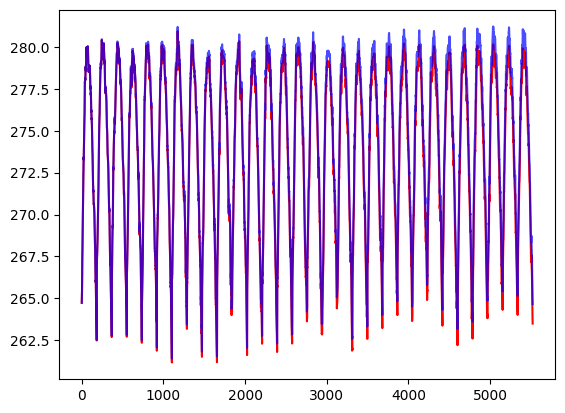

In [113]:
import netCDF4 as nc
from scipy.stats import pearsonr
from scipy.stats import linregress
# Open the NetCDF file
mode="daily"
time="historical"

filename_arc = r'N:/atm_glomod/user/jomuel001/CMIP6_models_tas/MPI-ESM1-2-HR/tas_ssp5_MPI-ESM1-2-HR_2070-2099.Nor_mjjaso_fldmean.nc'
filename_arc_hist = r'N:/atm_glomod/user/jomuel001/CMIP6_models_tas/MPI-ESM1-2-HR/tas_hist_MPI-ESM1-2-HR_1985-2014.Nor_mjjaso_fldmean.nc'
filename_glob = r'N:/atm_glomod/user/jomuel001/CMIP6_models_tas/MPI-ESM1-2-HR/tas_ssp5_MPI-ESM1-2-HR_2070-2099.glob_mjjaso_fldmean.nc'
filename_glob_hist = r'N:/atm_glomod/user/jomuel001/CMIP6_models_tas/MPI-ESM1-2-HR/tas_hist_MPI-ESM1-2-HR_1985-2014.glob_mjjaso_fldmean.nc' #
if time == "historical":
    data_arc_hist = nc.Dataset(filename_arc_hist)
    # data_glob = nc.Dataset(filename_glob)
    data_glob_hist = nc.Dataset(filename_glob_hist)
    circ_regimes = r'N:/atm_glomod/user/jomuel001/CMIP6_models/MPI-ESM1-2-HR/AREA.-90_90_89.7849_29.0866/CLUSTER/KMEANSslp_hpa_MPI-ESM1-2-HR_1985-2014.N_mjjaso_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA51985-2014slp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5tabcluster_10tabPC_dates'
elif time == "future":
    data_arc_hist = nc.Dataset(filename_arc)
    # data_glob = nc.Dataset(filename_glob)
    data_glob_hist = nc.Dataset(filename_glob)
    circ_regimes = r'N:/atm_glomod/user/jomuel001/CMIP6_models/MPI-ESM1-2-HR/AREA.-90_90_89.7849_29.0866/CLUSTER/KMEANSslp_hpa_MPI-ESM1-2-HR_2070-2099.N_mjjaso_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA51985-2014slp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5tabcluster_10tabPC_dates'

num_1_array=[]
num_2_array=[]
num_3_array=[]
num_4_array=[]
num_5_array=[]
tas = []
def monthly_mean_tas(data):
     for k in range(0,30,1):
        data_snippet = data[k*184:31+k*184]
        percentages = np.mean(data_snippet)
        tas.append(percentages)

        
        data_snippet = data[k*184+31:61+k*184]
        percentages = np.mean(data_snippet)
        tas.append(percentages)
        
        data_snippet = data[k*184+61:92+k*184]
        percentages = np.mean(data_snippet)
        tas.append(percentages)
        
        data_snippet = data[k*184+92:123+k*184]
        percentages = np.mean(data_snippet)
        tas.append(percentages)
        
        data_snippet = data[k*184+123:153+k*184]
        percentages = np.mean(data_snippet)
        tas.append(percentages)
        
        data_snippet = data[k*184+153:184+k*184]
        percentages = np.mean(data_snippet)
        tas.append(percentages)
        

def monthly_mean(data):
    for k in range(0,30,1):
        data_snippet = data[k*184:31+k*184]
        occurrences, _ = np.histogram(data_snippet, bins=np.arange(1, 7))
        percentages = (occurrences / len(data_snippet)) * 100
        num_1_array.append(percentages[0])
        num_2_array.append(percentages[1])
        num_3_array.append(percentages[2])
        num_4_array.append(percentages[3])
        num_5_array.append(percentages[4])
        
        data_snippet = data[k*184+31:61+k*184]
        occurrences, _ = np.histogram(data_snippet, bins=np.arange(1, 7))
        percentages = (occurrences / len(data_snippet)) * 100
        num_1_array.append(percentages[0])
        num_2_array.append(percentages[1])
        num_3_array.append(percentages[2])
        num_4_array.append(percentages[3])
        num_5_array.append(percentages[4])
        
        data_snippet = data[k*184+61:92+k*184]
        occurrences, _ = np.histogram(data_snippet, bins=np.arange(1, 7))
        percentages = (occurrences / len(data_snippet)) * 100
        num_1_array.append(percentages[0])
        num_2_array.append(percentages[1])
        num_3_array.append(percentages[2])
        num_4_array.append(percentages[3])
        num_5_array.append(percentages[4])
        
        data_snippet = data[k*184+92:123+k*184]
        occurrences, _ = np.histogram(data_snippet, bins=np.arange(1, 7))
        percentages = (occurrences / len(data_snippet)) * 100
        num_1_array.append(percentages[0])
        num_2_array.append(percentages[1])
        num_3_array.append(percentages[2])
        num_4_array.append(percentages[3])
        num_5_array.append(percentages[4])
        
        data_snippet = data[k*184+123:153+k*184]
        occurrences, _ = np.histogram(data_snippet, bins=np.arange(1, 7))
        percentages = (occurrences / len(data_snippet)) * 100
        num_1_array.append(percentages[0])
        num_2_array.append(percentages[1])
        num_3_array.append(percentages[2])
        num_4_array.append(percentages[3])
        num_5_array.append(percentages[4])
        
        data_snippet = data[k*184+153:184+k*184]
        occurrences, _ = np.histogram(data_snippet, bins=np.arange(1, 7))
        percentages = (occurrences / len(data_snippet)) * 100
        num_1_array.append(percentages[0])
        num_2_array.append(percentages[1])
        num_3_array.append(percentages[2])
        num_4_array.append(percentages[3])
        num_5_array.append(percentages[4])
    
    
    
    

data_circ_regimes = np.loadtxt(circ_regimes, delimiter=' ')
#for i in range(0,30,1):
#    data_circ_regimes[]
data_regimes = data_circ_regimes[:,3]

# data_arc = nc.Dataset(filename_arc)


# # Access the "tas" variable
# tas_glob = data_glob.variables['tas']
tas_glob_hist = data_glob_hist.variables['tas']

# tas_arc = data_arc.variables['tas']
tas_arc_hist = data_arc_hist.variables['tas']
# # Read the variable values
# tas_values_glob = tas_glob[:,0,0]
tas_values_glob_hist = tas_glob_hist[:,0,0]
# tas_diff_glob = tas_values_glob- tas_values_glob_hist
# global_slope, global_intercept = linregress(np.arange(len(tas_diff_glob)), tas_diff_glob)

# tas_values_arc = tas_arc[:,0,0]
tas_values_arc_hist = tas_arc_hist[:,0,0]
# tas_diff_arc = tas_values_arc - tas_values_arc_hist
# aa_index_slope, aa_index_intercept, _, _, _ = linregress(np.arange(len(tas_diff_arc)), tas_diff_arc)

# #print(tas_values_glob)
# aa_index = arctic_slope / global_slope
# smoothed_data = pd.Series(aa_index).rolling(window=20, center=True, min_periods=1).mean()
days=np.arange(1,5521,1)
if mode=="daily":
    aa_index = tas_values_arc_hist 
    aa_index_slope, aa_index_intercept, _, _, _  = linregress(np.arange(len(aa_index)), aa_index)
    aa_index_detrended = aa_index - aa_index_slope*days

    print(aa_index_slope)
    #print(tas_values_arc_hist)
    # Access the smoothed values
    #smoothed_aa = smoothed_data.values

    plt.plot(days,aa_index_detrended, color="red")
    plt.plot(days,aa_index, color='blue',alpha=0.7)
    unique_regimes = np.unique(data_regimes)
    #plt.xlim(0,180)
    # Calculate correlation for each regime
    correlation_coefficients = {}
    num_1_array = np.where(data_regimes == 1, 1, 0)
    num_2_array = np.where(data_regimes == 2, 1, 0)
    num_3_array = np.where(data_regimes == 3, 1, 0)
    num_4_array = np.where(data_regimes == 4, 1, 0)
    num_5_array = np.where(data_regimes == 5, 1, 0)

    correlation_1, p_value_1 = pearsonr(aa_index_detrended, num_1_array)
    correlation_coefficients_1 = correlation_1

    print(f"Correlation for 1: {correlation_1}")
    print(f"P-value for 1: {p_value_1}")

    correlation_2, p_value_2 = pearsonr(aa_index_detrended, num_2_array)
    correlation_coefficients_2 = correlation_2

    print(f"Correlation for 2: {correlation_2}")
    print(f"P-value for 2: {p_value_2}")


    correlation_3, p_value_3 = pearsonr(aa_index_detrended, num_3_array)
    correlation_coefficients_3 = correlation_3

    print(f"Correlation for 3: {correlation_3}")
    print(f"P-value for 3: {p_value_3}")


    correlation_4, p_value_4 = pearsonr(aa_index_detrended, num_4_array)
    correlation_coefficients_4 = correlation_4

    print(f"Correlation for 4: {correlation_4}")
    print(f"P-value for 4: {p_value_4}")


    correlation_5, p_value_5 = pearsonr(aa_index_detrended, num_5_array)
    correlation_coefficients_5 = correlation_5

    print(f"Correlation for 5: {correlation_5}")
    print(f"P-value for 5: {p_value_5}")
    if time=="historical":
        hist_daily_corr = np.array([correlation_1,correlation_2,correlation_3,correlation_4,correlation_5])
        hist_daily_signi = np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
    elif time=="future":
        future_daily_corr = np.array([correlation_1,correlation_2,correlation_3,correlation_4,correlation_5])
        future_daily_signi = np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
elif mode=="monthly":
    monthly_mean(data_regimes)
    monthly_mean_tas(aa_index_detrended)
    correlation_1, p_value_1 = pearsonr(tas, num_1_array)
    correlation_coefficients_1 = correlation_1

    print(f"Correlation for 1: {correlation_1}")
    print(f"P-value for 1: {p_value_1}")
    correlation_2, p_value_2 = pearsonr(tas, num_2_array)
    correlation_coefficients_2 = correlation_2

    print(f"Correlation for 2: {correlation_2}")
    print(f"P-value for 2: {p_value_2}")


    correlation_3, p_value_3 = pearsonr(tas, num_3_array)
    correlation_coefficients_3 = correlation_3

    print(f"Correlation for 3: {correlation_3}")
    print(f"P-value for 3: {p_value_3}")


    correlation_4, p_value_4 = pearsonr(tas, num_4_array)
    correlation_coefficients_4 = correlation_4

    print(f"Correlation for 4: {correlation_4}")
    print(f"P-value for 4: {p_value_4}")


    correlation_5, p_value_5 = pearsonr(tas, num_5_array)
    correlation_coefficients_5 = correlation_5

    print(f"Correlation for 5: {correlation_5}")
    print(f"P-value for 5: {p_value_5}")
    if time=="historical":
        hist_monthly_corr = np.array([correlation_1,correlation_2,correlation_3,correlation_4,correlation_5])
        hist_monthly_signi = np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
    elif time=="future":
        future_monthly_corr = np.array([correlation_1,correlation_2,correlation_3,correlation_4,correlation_5])
        future_monthly_signi = np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
    

#data_arc.close()
#data_glob.close()

In [123]:
rows = ['Historical Daily', 'Historical Monthly', 'Future Daily', 'Future Monthly']
columns = ['Number 1', 'Number 2', 'Number 3', 'Number 4', 'Number 5']
correlations=[hist_daily_corr, hist_monthly_corr, future_daily_corr, future_monthly_corr]
significance_array=[hist_daily_signi, hist_monthly_signi, future_daily_signi, future_monthly_signi]
significance_boolean = [val < 0.05 for val in significance_array]
# Create a DataFrame from the number_array
df = pd.DataFrame(correlations, index=rows, columns=columns)
value_threshold=0.05
def color_cells(val, significance):
    color = 'background-color: None'  # Default cell color
    if val > value_threshold:
        color = 'background-color: green'  # Color for values above threshold
    elif val < -value_threshold:
        color = 'background-color: red'  # Color for values below threshold
    return color

# Apply the cell formatting function to the DataFrame
styled_df = df.style.applymap(color_cells, significance=significance_boolean)

# Save the styled DataFrame as a PNG image
#styled_df.to_image('tabular.png', format='png')

# Display the DataFrame with styling in Jupyter Notebook (optional)
styled_df

,Number 1,Number 2,Number 3,Number 4,Number 5
Historical Daily,0.003071,0.038815,-0.004092,-0.046497,0.007385
Historical Monthly,0.009968,0.130317,-0.042097,-0.099852,0.019643
Future Daily,0.012183,0.028257,-0.053968,-0.033341,0.045236
Future Monthly,0.053917,0.062998,-0.157461,-0.072705,0.167498


In [122]:
significance_boolean

[array([False,  True, False,  True, False]),
 array([False, False, False, False, False]),
 array([False,  True,  True,  True,  True]),
 array([False, False,  True, False,  True])]